# electrostatics problem

You reach the required tolerance in  3013 iterations


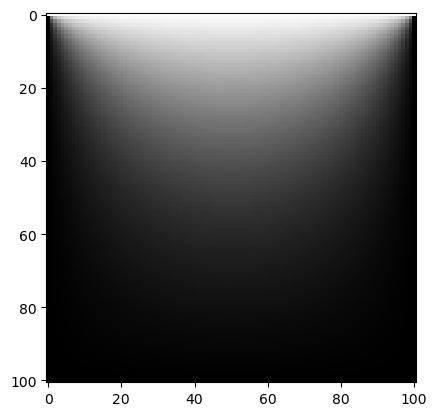

' this means that BOTH lists and numpy arrays (and in general objects in python) are stored by reference: you do not assign the value of phi to phiold, but a pointer to the object that phi is pointing to.'

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 22 17:11:58 2020

@author: astro
"""
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as line

#empty 2D box with conducting walls
tol=1e-3 #tolerance 
M=int(100) # vlaue of M 

phi=np.zeros([M+1,M+1],float) #new iteration of the matrix

#boundary conditions:
V=1.0 #V=1Volt in the first row of the box(matrix)
phi[0,:]= V #first row, all columns
phi[M,:]=phi[1:M,0]=phi[1:M,M]=0. #V=0Volt along the other 3 walls
diff=100. 
phiold=np.empty([M+1,M+1],float) #old iteration of the matrix
"""
where phi and phiold are the new and the old iteration of the matrix (this
treats the two matrices as two vectors and calculates the norm of their
difference.
"""

#Gauss-Seidel
iteration=0 
while(diff>tol):
    phiold=np.copy(phi)  #explaination see below
    for i in range(M+1):   #i is the index of row
        for j in range(M+1):  #j is the index of columns
            if(i==0 or i==M or j==0 or j==M):
                phi[i,j]=phi[i,j]+0
            else:
                phi[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    diff=np.linalg.norm(phi-phiold) #gauss-seidel then I recompute using phi[i,j] to update new value then swap to keep new value if toler is meet 
    iteration+=1
  
 
print('You reach the required tolerance in ',iteration, 'iterations')
 

#density plot
plt.imshow(phi) #phi is the final matrix
plt.gray()
plt.show()



""" this means that BOTH lists and numpy arrays (and in general objects in python) are stored by reference: you do not assign the value of phi to phiold, but a pointer to the object that phi is pointing to."""



